In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import mmread, mmwrite

In [2]:
projdir = '/u/home/t/terencew/project-cluo/igvf/pilot/multiome/'
donors = list(np.loadtxt(f'{projdir}/txt/donors.txt', dtype=str))
samples = list(np.loadtxt(f'{projdir}/txt/samples.txt', dtype=str))
s = samples[0]

gex_methods = ['demuxlet', 'freemuxlet', 'vireo', 'vireo_nogenos',
               'scsplit', 'scsplit_nogenos',
            'souporcell', 'souporcell_nogenos', 'demuxalot', 'ambimux']
atac_methods = ['demuxlet', 'freemuxlet', 'vireo', 'vireo_nogenos',
               'scsplit', 'scsplit_nogenos',
            'souporcell', 'souporcell_nogenos', 'scavengers', 'ambimux']

con_cols = ['C1', 'C2', 'I1', 'I2']

In [5]:
gex = pd.read_csv(f'{projdir}/csv/demux/inter_gex.csv', sep='\t',
                  header=0, index_col=0)
atac = pd.read_csv(f'{projdir}/csv/demux/inter_atac.csv', sep='\t',
                   header=0, index_col=0)
gex.replace({'doublet' : 'non_singlet' , 'unassigned' : 'non_singlet'}, inplace=True)
atac.replace({'doublet' : 'non_singlet' , 'unassigned' : 'non_singlet'}, inplace=True)

gex.shape, atac.shape

((30497, 9), (30497, 9))

In [8]:
ambimux = pd.read_csv(f'{projdir}/csv/demux/ambimux.csv', sep='\t', header=0, index_col=0)
gex['ambimux'] = ambimux['best_sample']
atac['ambimux'] = ambimux['best_sample']

In [9]:
gex

,demuxlet,freemuxlet,vireo,vireo_nogenos,souporcell,souporcell_nogenos,demuxalot,scsplit,scsplit_nogenos,ambimux
AAACAGCCAAGGTATA-1_20220928-IGVF-D0,27_C4,27_C4,27_C4,27_C4,27_C4,27_C4,27_C4,48_V3,27_C4,27_C4
AAACAGCCAATGCGCT-1_20220928-IGVF-D0,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4
AAACAGCCAGCAAATA-1_20220928-IGVF-D0,27_C4,27_C4,27_C4,27_C4,27_C4,27_C4,27_C4,48_V3,27_C4,27_C4
AAACAGCCATTGTGAT-1_20220928-IGVF-D0,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4
AAACATGCAAACATAG-1_20220928-IGVF-D0,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4
...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTTCCAGGG-1_20220928-IGVF-D3,26_A10,non_singlet,non_singlet,non_singlet,26_A10,non_singlet,non_singlet,non_singlet,non_singlet,26_A10:48_V3
TTTGTTGGTTCCTGTG-1_20220928-IGVF-D3,non_singlet,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4
TTTGTTGGTTGCCTCA-1_20220928-IGVF-D3,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4
TTTGTTGGTTGGATAT-1_20220928-IGVF-D3,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4


In [10]:
tmp_gex = gex.copy()
tmp_atac = atac.copy()
tmp_gex['inter'] = gex.eq(gex.iloc[:, 0], axis=0).all(1)
tmp_atac['inter'] = atac.eq(atac.iloc[:, 0], axis=0).all(1)
# tmp_gex['majority'] = gex.mode(axis=1)[0]
# tmp_atac['majority'] = atac.mode(axis=1)[0]

# gex['majority'] = tmp_gex['majority']
# atac['majority'] = tmp_atac['majority']

gex['inter'] = tmp_gex['inter']
atac['inter'] = tmp_atac['inter']

# gex_inter = pd.DataFrame(tmp_gex[tmp_gex['inter']]['demuxlet'])
# gex_inter.columns = ['inter']

# atac_inter = pd.DataFrame(tmp_atac[tmp_atac['inter']]['demuxlet'])
# atac_inter.columns = ['inter']

gex.shape, atac.shape

((30497, 11), (30497, 11))

In [11]:
tmp_gex = gex.iloc[:,:7]
tmp_gex.columns = [f'gex_{x}' for x in tmp_gex.columns]
tmp_atac = atac.iloc[:,:6]
tmp_atac.columns = [f'atac_{x}' for x in tmp_atac.columns]
 
merged = pd.concat([tmp_gex, tmp_atac], axis=1)
merged['inter'] = merged.eq(merged.iloc[:, 0], axis=0).all(1)

In [12]:
gex_mask = ~gex['inter']
unique_gex = gex[gex_mask]

atac_mask = ~atac['inter']
unique_atac = atac[atac_mask]

all_mask = ~merged['inter']
unique_all = gex[all_mask]
unique_gex.shape, unique_atac.shape, unique_all.shape

((13656, 11), (10120, 11), (12921, 11))

In [13]:
gex_unique = pd.DataFrame(index=gex_methods, columns=['n_drops'], data=0)
for method in gex_methods:
    mask = gex[method] != 'non_singlet'
    method_gex = gex[mask]
    gex_unique.loc[method] = method_gex.shape[0] - np.sum(method_gex['inter'])
gex_unique['method'] = gex_unique.index
gex_unique['mod'] = 'gex'

In [14]:
atac_unique = pd.DataFrame(index=atac_methods, columns=['n_drops'], data=0)
for method in atac_methods:
    mask = atac[method] != 'non_singlet'
    method_atac = atac[mask]
    atac_unique.loc[method] = method_atac.shape[0] - np.sum(method_atac['inter'])
atac_unique['method'] = atac_unique.index
atac_unique['mod'] = 'atac'

In [15]:
merged_unique = pd.concat([gex_unique, atac_unique])
merged_unique

,n_drops,method,mod
demuxlet,4567,demuxlet,gex
freemuxlet,11331,freemuxlet,gex
vireo,5327,vireo,gex
vireo_nogenos,6508,vireo_nogenos,gex
scsplit,6861,scsplit,gex
scsplit_nogenos,7215,scsplit_nogenos,gex
souporcell,7297,souporcell,gex
souporcell_nogenos,8092,souporcell_nogenos,gex
demuxalot,3143,demuxalot,gex
ambimux,13656,ambimux,gex


Text(0.5, 1.0, 'Stem cell dataset')

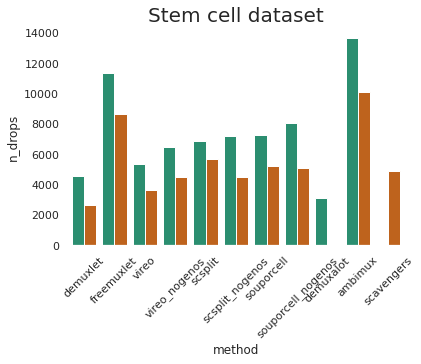

In [16]:
sns.set_theme(palette='Dark2')
ax = sns.barplot(merged_unique, x='method', y='n_drops', hue='mod')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.legend_.set_visible(False)
ax.grid(False)
ax.set_facecolor('white')
ax.set_title('Stem cell dataset', size=20)

In [20]:
merged_unique.reset_index(drop=True, inplace=True)
merged_unique.loc[18,:] = [0, 'scavengers', 'gex']
merged_unique.loc[19,:] = [0, 'demuxalot', 'atac']
merged_unique.loc[20,:] = [0, 'ambimux', 'atac']
merged_unique

,n_drops,method,mod
0,4567.0,demuxlet,gex
1,11331.0,freemuxlet,gex
2,5327.0,vireo,gex
3,6508.0,vireo_nogenos,gex
4,6861.0,scsplit,gex
5,7215.0,scsplit_nogenos,gex
6,7297.0,souporcell,gex
7,8092.0,souporcell_nogenos,gex
8,3143.0,demuxalot,gex
9,13656.0,ambimux,gex


In [22]:
merged_unique.to_csv(f'{projdir}/csv/final_figures/figure6/unique_drops_ambimux.csv', sep='\t', header=True, index=True)